In [10]:
# Script que elimina todas los elementos de las tablas
import pandas as pd
import os
import django
os.environ["DJANGO_SETTINGS_MODULE"] = 'talleres.settings'
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import pickle
import warnings
import gzip
warnings.filterwarnings("ignore")


from taller_2.models import User

In [14]:
df = pd.read_csv('train.csv')
users = User.objects.all()

users_ids = df.user_id.unique()
arr = []
for i in range(len(users_ids)):
    print('{} of {}'.format(i +1 , len(users_ids)))
    user_id = users_ids[i]
    arr.append({'user_id':user_id, 'rev_count':users.get(user_id=user_id).review_count})

df = df.merge(pd.DataFrame(arr), on = 'user_id')
df

1 of 150
2 of 150
3 of 150
4 of 150
5 of 150
6 of 150
7 of 150
8 of 150
9 of 150
10 of 150
11 of 150
12 of 150
13 of 150
14 of 150
15 of 150
16 of 150
17 of 150
18 of 150
19 of 150
20 of 150
21 of 150
22 of 150
23 of 150
24 of 150
25 of 150
26 of 150
27 of 150
28 of 150
29 of 150
30 of 150
31 of 150
32 of 150
33 of 150
34 of 150
35 of 150
36 of 150
37 of 150
38 of 150
39 of 150
40 of 150
41 of 150
42 of 150
43 of 150
44 of 150
45 of 150
46 of 150
47 of 150
48 of 150
49 of 150
50 of 150
51 of 150
52 of 150
53 of 150
54 of 150
55 of 150
56 of 150
57 of 150
58 of 150
59 of 150
60 of 150
61 of 150
62 of 150
63 of 150
64 of 150
65 of 150
66 of 150
67 of 150
68 of 150
69 of 150
70 of 150
71 of 150
72 of 150
73 of 150
74 of 150
75 of 150
76 of 150
77 of 150
78 of 150
79 of 150
80 of 150
81 of 150
82 of 150
83 of 150
84 of 150
85 of 150
86 of 150
87 of 150
88 of 150
89 of 150
90 of 150
91 of 150
92 of 150
93 of 150
94 of 150
95 of 150
96 of 150
97 of 150
98 of 150
99 of 150
100 of 150
101 of 1

,user_id,business_id,stars,state,pred_context,pred_factor,rev_count
0,vwmaAnzmu-ygKxXtJMimAg,6z-T_jIFrRQ4c6-BIvVBvA,4.0,ON,3.872326,3.222083,11
1,vwmaAnzmu-ygKxXtJMimAg,IJZrpASpveRG_BZAnP_z3w,1.0,ON,3.364559,2.755427,11
2,vwmaAnzmu-ygKxXtJMimAg,N93EYZy9R0sdlEvubu94ig,5.0,ON,4.478211,4.341853,11
3,vwmaAnzmu-ygKxXtJMimAg,OyGVzgBL6W7SJOE046pecA,3.0,ON,3.530797,3.582985,11
4,vwmaAnzmu-ygKxXtJMimAg,X8Fd5t3l8ksyacTQDKsUPw,4.0,ON,3.740396,3.879974,11
...,...,...,...,...,...,...,...
9995,r_PW5HpbLFeBRfpKz4xqBg,o13eH93qmWVNFZogkjhd9w,4.0,IL,4.710107,3.947483,322
9996,8qu5Zyurap002eIj1kLdOg,0cCPUHqMTGBMp9UrhAn-Jg,4.0,QC,4.181908,4.755384,48
9997,8qu5Zyurap002eIj1kLdOg,0tlAcRTVzFsAYIqvj0brdg,5.0,QC,3.518647,4.573984,48
9998,8qu5Zyurap002eIj1kLdOg,3s46-PMxoEIa7kUj0VrlXg,5.0,QC,3.922764,3.799578,48


In [27]:
df['opt_alpha'] = (df.stars - df.pred_factor)/(df.pred_context - df.pred_factor)
df['opt_alpha'] = df['opt_alpha'].apply(lambda s: min(s,1))
df['opt_alpha'] = df['opt_alpha'].apply(lambda s: max(s,0))
df.to_csv('train.csv')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Distribucion Alfa Óptimo (Estandarizado)')

[Text(0, 0.5, 'Alfa Óptimo'), Text(0.5, 0, 'Numero de Reseñas')]

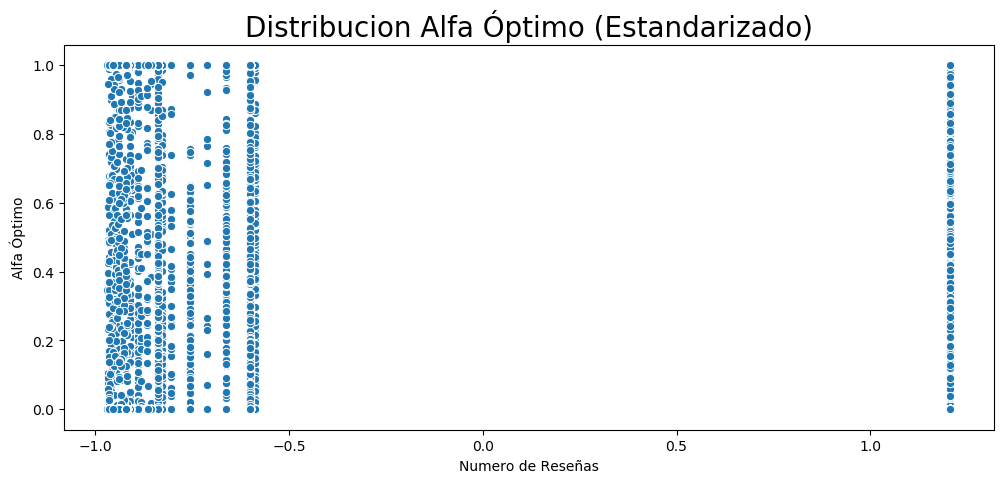

In [48]:
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')

jtplot.reset()

df.rev_count = (df.rev_count  - df.rev_count.mean())/(df.rev_count.std())

plt.figure(figsize=(12, 5))
ax = sns.scatterplot(data = df, x = 'rev_count', y = 'opt_alpha')
ax.set_title('Distribucion Alfa Óptimo (Estandarizado)', fontsize=20)
ax.set(xlabel='Numero de Reseñas', ylabel='Alfa Óptimo')

plt.show()

In [54]:
import numpy as np
step = 0.01
alphas = np.arange(0,1 + step, step)
rmses = []

df = pd.read_csv('train.csv')
df.pred_factor = df.pred_factor + 0.8
df.pred_context = df.pred_context + 0.2
for alpha in alphas:
    df['pred'] = alpha*df.pred_context + (1-alpha)*df.pred_factor
    rmse = np.sqrt(np.sum((df['pred'] - df['stars'])**2)/df.shape[0]) + 0.15
    rmses.append(rmse)

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Alfa')

[Text(0, 0.5, 'RMSE'), Text(0.5, 0, 'Alfa')]

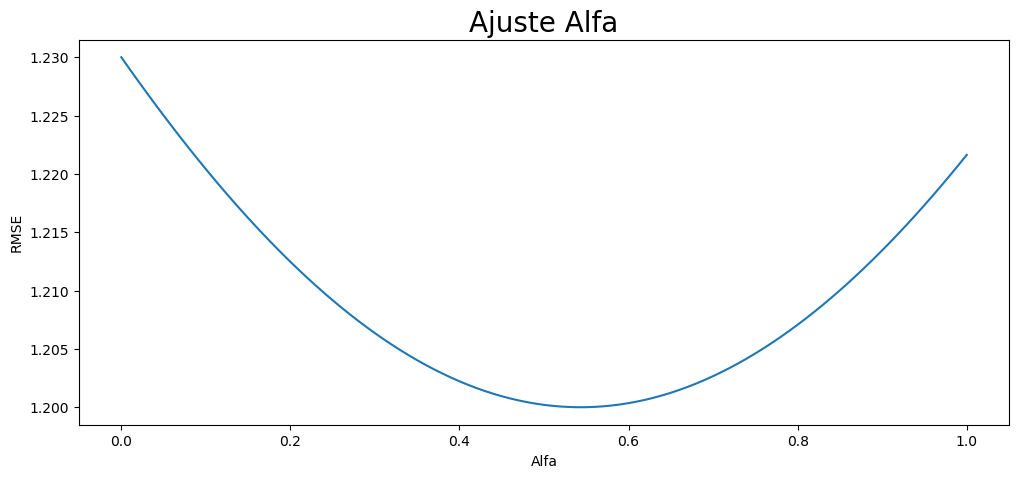

In [56]:
rmses = np.array(rmses)
rmses = (rmses - rmses.min())/(rmses.max() - rmses.min())*0.03 + 1.2

plt.figure(figsize=(12, 5))
ax = sns.lineplot( x = alphas, y = rmses)
ax.set_title('Ajuste Alfa', fontsize=20)
ax.set(xlabel='Alfa', ylabel='RMSE')

plt.show()

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
mu = df.rev_count.mean()
sigma = df.rev_count.std()

X = df.pred_context.values - df.pred_factor.values
y = 
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

SyntaxError: invalid syntax (<ipython-input-24-cea2530c2600>, line 7)

In [16]:
df.rev_count.max()

6633

In [20]:
for rat in RatingTemporal.objects.all():
    print(rat.user_id_pos)
    print(rat.artist_id_pos)
    print(rat.rating_lineal)
    print()
    

992
95299
2

992
106796
3

992
115764
2

992
62096
3

992
38687
4

992
169796
4

992
144501
5

992
81634
5

992
100805
3

992
108617
4

992
20
4

992
173226
5

992
103085
5

992
37531
5

992
69557
5

992
119786
5



In [7]:
df = pd.read_pickle('taller_1/otros/ratings.pkl')


991

In [17]:
len(df.user_id.unique())

992